# Diszkrét dinamikai rendszerek és kaotikus attraktorok

Tegyük fel, hogy adott egy $f:\mathbb{R}^n\to\mathbb{R}^n$ leképezés. Tetszőleges $x_0\in\mathbb{R}^n$ kezdőértéket választva tekinthetjük $f$ iteráltjainak egy $x_0, f(x_0), f(f(x_0)),\ldots$ sorozatát, melynek tagjai általánosságban az
$$
x_{n+1} = f(x_n)
$$
rekurzióval adhatók meg.

Amennyiben az $n\in\mathbb{N}$ paramétert időként interpretáljuk, szokás a fenti rekurziót (autonóm) *diszkrét dinamikai rendszernek* nevezni. Az $x_0, x_1, x_2,\ldots$ sorozatot pedig a dinamikai $x_0\in\mathbb{R}^n$ kezdőértékhez tartozó *trajektóriájának* hívjuk.

Vezessük be a $\Phi:\mathbb{N}\times\mathbb{R}^n\to\mathbb{R}^n$ *fázisfolyam leképezést* $\Phi (n, x_0):=x_n$. A fázisfolyam leképezés lényegében az "időléptetést" írja le, és könnyen meggondolható, hogy teljesíti a
$$
\Phi (n, \Phi(m, x_0)) = \Phi (n+m, x_0)
$$
félcsoport tulajdonságot.

A különböző pontokból kiinduló trajektóriák hosszútávú viselkedését figyelve előfordulhat, hogy azok a kezdőérték választásától nagy mértékben függetlenül a fázistér egy $A\subset\mathbb{R}^n$ részhalmazába futnak be, az $A$-ból induló trajektóriák pedig egyáltalán nem hagyják el az $A$ halmazt. Az ilyen minimális invariáns határhalmazt *attraktor*-nak nevezzük. A szabatos definíció a következő:
\begin{definition}

\end{definition}

## A Logisztikus leképezés

A $\mu\in (0,1)$ paraméter tetszőleges rögzített értéke mellett az $f(x)=4\mu x(1-x)$ hozzárendelés egy $f:(0,1)\to (0,1)$ függvényt ad meg, melyet *logisztikus leképezésnek nevezünk*. Az alábbiakban tetszőleges $x_0\in (0,1)$ pontból kiindulva az $f$ függvény iteráltjainak, más szóval az 
$$x_{n+1} = f(x_n)$$ 
rekurzióval adott *diszkrét dinamikai rendszer* viselkedését tanulmányozzuk. 

A $\mu$ paramétert változtatva érdekes jelenséget tapasztalhatunk.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, mu: 4.0*mu*x*(1-x)  # a logisztikus leképezés

def iterate(mu, x0):
    """
    Ezzel a generátorral egy x0 pontból kiindulva, 
    tetszőleges mu értéket rögzítve tudunk iteráltakat számolni.
    """
    
    x = x0*np.ones_like(mu)
    
    while True:
        yield x        
        x = f(x, mu)
                
def trajectory(mu, x0, N):
    """
    N hosszú trajektóriákat ad vissza.
    """
    
    x = iterate(mu, x0)
    
    return np.array([next(x) for k in range(N)])

def BifurcationDiagram(x0, nTransient, nCycle, muArray, plot=True):
    """
    Bifurkációs diagramm rajzolása:
    muArray minden eleméhez számol egy trajektóriát úgy, hogy először
    nTransient lépést tesz, amikor is elér egy ún. attraktort, majd
    nCycle pontban kirajzolja az attraktort.
    """
    
    x = trajectory(muArray, x0, nTransient+nCycle)  # teljes trajektória
    x = x[nTransient:] # a tranzienseket elhagyjuk
    
    if plot:
        _, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.plot(muArray, x.T,'k,')
        
    

### Feladat

Az alábbi script a logisztikus egyenlet attraktorát rajzoltatja ki a $\mu$ paraméter különböző értékei mellett. Futtassuk le a szimulációkat! Mit figyelhetünk meg? Magyarázzuk meg a látottakat. Segítség: a következő gyakorlat címe.

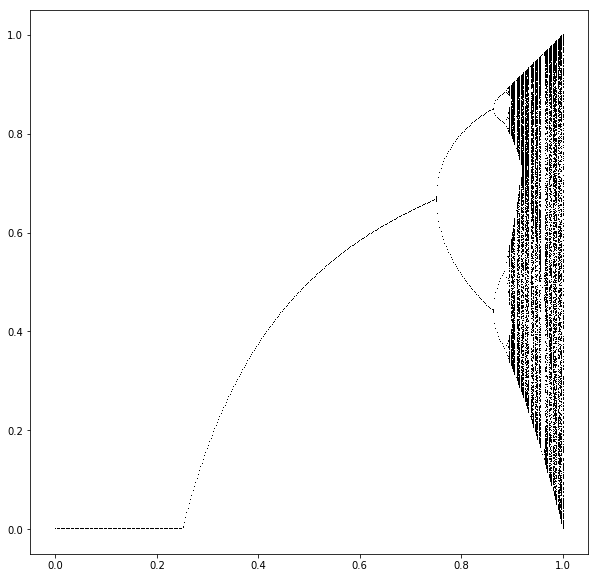

In [54]:
x0 = 0.1
nTransient = 500
nCycle = 500

# Teszteljük le az alábbi szcenáriókat.

muArray = np.linspace(0., 1.0, 400)
# muArray = np.linspace(0.85, 1.0, 400)
# muArray = np.linspace(0.96, 0.97, 400)

BifurcationDiagram(x0, nTransient, nCycle, muArray)

## Fraktál dimenzió

A tudományban sok különös halmaz jelenik meg. A statisztikai mechanikában ezek a halmazok folytonos fázisátmeneteknél jelentkeznek, ahol az önhasonló térbeli struktúrák jelentkeznek. A kaotikus dinamikai rendszerekben az vonzóhalmaz (a hosszú időn át elfoglalt állapotok halmaza, miután eltűntek a transziens jelenségek) gyakran nagyon furcsa. Ezek a halmazok gyakran áttetszők és szabálytalanok, minden hosszúsági skálán lyukakkal.

Gyakran próbáljuk ezeket a halmazokat fraktál dimenzióval jellemezni. Azonban két nagyon eltérő halmaz dimenziója ugyanaz lehet: egy véletlenszerű járás útja magas dimenziókban kétdimenziós, mint egy gömb felülete. Ha a fraktál dimenziók különbözőek, akkor a halmazok különbözőek.
 
Nincs egyetlen módja egy halmaz dimenziójának meghatározásának. Az edzés a kapacitásdimenziót (eredeti nevén a Hausdorff dimenziót) és az információdimenziót (az entrópiaval kapcsolatban) fogja kiszámítani. A különös halmaz generálásához egy rendszert használunk, amelynek van egy különös vonzóhalmaza és folytonos fázisátmenetben van: a logisztikus térképet a kaotikus periódusdobálás kezdetén.  

## Lyapunov-exponens

## Invariáns mérték

# További olvasnivalók

1. https://cac.cornell.edu/myers/teaching/ComputationalMethods/ComputerExercises/Bifurcation/Bifurcation.html

2. https://en.wikipedia.org/wiki/Attractor

3. https://en.wikipedia.org/wiki/Chaos_theory

4. https://en.wikipedia.org/wiki/Lyapunov_exponent

5. https://en.wikipedia.org/wiki/Hurst_exponent